In [100]:
from __future__ import division, print_function, unicode_literals

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
from scipy import stats
import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
import time
import re
import math
from docx import Document

# import packages for data visulatzation 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# modeling routines from Scikit Learn packages for model develipment
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix , accuracy_score , classification_report, make_scorer,recall_score
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import regularizers

# obtain precision, recall, F1, and support metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# specify the set of classifiers being evaluated
from sklearn.ensemble import RandomForestClassifier

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'

import warnings
warnings.filterwarnings("ignore")
# set KMP_DUPLICATE_LIB_OK=TRUE      #  Windows
# set up randam seed
random_seed = 55
import tensorflow as tf
import torch
import platform
# baidu translator
import json
from hashlib import md5
import random
import requests

from sklearn.impute import KNNImputer
import pickle

In [101]:
print(platform.python_version())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))  
print(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
print(torch.__version__)

3.9.12
Num GPUs Available:  1
cuda
2.1.1+cu121


In [102]:
os.chdir(r"E:/CNSI_project/demo_and_data_5.0/Processed_data/Extr_val")

In [103]:
pd.set_option('display.max_columns',100)

In [104]:
def FileClear(top):
    for root, dirs, files in os.walk(top, topdown=False):
        for name in files:
            os.remove(os.path.join(root, name))
        for name in dirs:
            os.rmdir(os.path.join(root, name))

In [105]:
aim1_df1 = pd.read_csv('E:/CNSI_project/demo_and_data_3.0/Raw_data/mimic3_aim1_v1.0.csv')
aim1_df1

,subject_id,hadm_id,chartdate,Blood Gas~Blood~pO2~50821~mm Hg_MM HG_,Chemistry~Blood~Albumin~50862~g/dL_,Chemistry~Blood~Creatinine~50912~mg/dL_,Chemistry~Blood~Glucose~50931~mg/dL_,B_H,B_I,Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L,Chemistry~Blood~Potassium~50971~mEq/L_,Chemistry~Blood~Sodium~50983~mEq/L_,Hematology~Blood~Hemoglobin~51222~g/dL_,Hematology~Blood~Lymphocytes~51244~%_,Hematology~Blood~MCHC~51249~%_,Hematology~Blood~Monocytes~51254~%_,Hematology~Blood~Platelet Count~51265~K/uL_,Hematology~Blood~PTT~51275~sec_,"Chemistry~Cerebrospinal Fluid (CSF)~Glucose, CSF~51014~mg/dL","Chemistry~Cerebrospinal Fluid (CSF)~Total Protein, CSF~51018~mg/dL",B_Absolute Monocyte Count,B_Immature Granulocytes,Hematology~Blood~RDW~51277~%_,Hematology~Cerebrospinal Fluid (CSF)~Lymphs~51351~%,Hematology~Cerebrospinal Fluid (CSF)~Macrophage~51352~%,Hematology~Cerebrospinal Fluid (CSF)~Polys~51360~%,resprate,pain,acuity,culture
0,31,128652.0,2108-08-23,111.0,NaN,0.7,101.0,NaN,NaN,204.0,3.7,133.0,NaN,NaN,NaN,NaN,184.0,28.5,63.0,63.0,NaN,NaN,NaN,33.0,NaN,37.0,12.076923,NaN,NaN,0
1,78,100536.0,2177-02-14,NaN,3.1,0.5,107.0,NaN,NaN,NaN,3.4,138.0,10.8,NaN,35.1,NaN,45.0,37.7,57.0,37.0,NaN,NaN,13.0,0.0,NaN,0.0,17.066667,NaN,NaN,0
2,92,142807.0,2122-12-17,142.0,NaN,NaN,NaN,NaN,NaN,NaN,3.7,138.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,142.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0
3,93,160481.0,2128-03-23,35.0,NaN,NaN,NaN,NaN,NaN,NaN,5.3,139.0,NaN,NaN,NaN,NaN,NaN,NaN,107.0,101.0,NaN,NaN,NaN,20.0,NaN,43.0,NaN,NaN,NaN,0
4,110,154943.0,2110-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,146.0,19.9,28.0,34.3,9.0,73.0,NaN,73.0,109.0,NaN,NaN,17.2,37.0,6.0,1.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,32786,165351.0,2152-11-19,NaN,NaN,0.8,147.0,NaN,NaN,NaN,4.0,142.0,11.1,NaN,34.4,NaN,292.0,24.2,93.0,64.0,NaN,NaN,13.7,4.0,NaN,85.0,22.065217,NaN,NaN,0
2112,32786,165351.0,2152-11-21,158.0,NaN,0.9,149.0,NaN,NaN,NaN,3.9,141.0,11.4,NaN,34.4,NaN,341.0,NaN,93.0,44.0,NaN,NaN,13.2,11.0,4.0,69.0,23.571429,NaN,NaN,0
2113,32786,165351.0,2152-11-23,98.0,NaN,1.0,142.0,NaN,NaN,274.0,3.8,143.0,10.6,NaN,34.1,NaN,370.0,24.5,75.0,75.0,NaN,NaN,13.2,8.0,27.0,63.0,25.758621,NaN,NaN,0
2114,32786,165351.0,2152-11-25,111.0,NaN,0.9,156.0,NaN,NaN,NaN,4.9,142.0,9.8,NaN,34.6,NaN,395.0,25.6,94.0,30.0,NaN,NaN,13.0,29.0,NaN,63.0,23.560000,NaN,NaN,0


In [106]:
selected_feature_names1 = aim1_df1.columns.tolist()
name_short = ['subject_id','hadm_id','chartdate','B_pO2','B_Albumin','B_Creatinine','B_Glucose','B_H','B_I','B_LactateDehydrogenase','B_Potassium','B_Sodium','B_Hemoglobin',
             'B_lymphocytes','B_MCHC','B_MonocytesPercentage','B_Platelet','B_PTT','C_Glucose','C_Protein','B_MonocyteCount',
             'B_ImmatureGranulocytes','B_RDW-SD','C_Lymphs','C_Macrophage','C_Ploys','resprate','pain','acuity','culture']
aim1_df1 = aim1_df1.rename(columns=dict(zip(selected_feature_names1, name_short)), inplace=False)
aim1_df1

,subject_id,hadm_id,chartdate,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,B_lymphocytes,B_MCHC,B_MonocytesPercentage,B_Platelet,B_PTT,C_Glucose,C_Protein,B_MonocyteCount,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Ploys,resprate,pain,acuity,culture
0,31,128652.0,2108-08-23,111.0,NaN,0.7,101.0,NaN,NaN,204.0,3.7,133.0,NaN,NaN,NaN,NaN,184.0,28.5,63.0,63.0,NaN,NaN,NaN,33.0,NaN,37.0,12.076923,NaN,NaN,0
1,78,100536.0,2177-02-14,NaN,3.1,0.5,107.0,NaN,NaN,NaN,3.4,138.0,10.8,NaN,35.1,NaN,45.0,37.7,57.0,37.0,NaN,NaN,13.0,0.0,NaN,0.0,17.066667,NaN,NaN,0
2,92,142807.0,2122-12-17,142.0,NaN,NaN,NaN,NaN,NaN,NaN,3.7,138.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,142.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0
3,93,160481.0,2128-03-23,35.0,NaN,NaN,NaN,NaN,NaN,NaN,5.3,139.0,NaN,NaN,NaN,NaN,NaN,NaN,107.0,101.0,NaN,NaN,NaN,20.0,NaN,43.0,NaN,NaN,NaN,0
4,110,154943.0,2110-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,146.0,19.9,28.0,34.3,9.0,73.0,NaN,73.0,109.0,NaN,NaN,17.2,37.0,6.0,1.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,32786,165351.0,2152-11-19,NaN,NaN,0.8,147.0,NaN,NaN,NaN,4.0,142.0,11.1,NaN,34.4,NaN,292.0,24.2,93.0,64.0,NaN,NaN,13.7,4.0,NaN,85.0,22.065217,NaN,NaN,0
2112,32786,165351.0,2152-11-21,158.0,NaN,0.9,149.0,NaN,NaN,NaN,3.9,141.0,11.4,NaN,34.4,NaN,341.0,NaN,93.0,44.0,NaN,NaN,13.2,11.0,4.0,69.0,23.571429,NaN,NaN,0
2113,32786,165351.0,2152-11-23,98.0,NaN,1.0,142.0,NaN,NaN,274.0,3.8,143.0,10.6,NaN,34.1,NaN,370.0,24.5,75.0,75.0,NaN,NaN,13.2,8.0,27.0,63.0,25.758621,NaN,NaN,0
2114,32786,165351.0,2152-11-25,111.0,NaN,0.9,156.0,NaN,NaN,NaN,4.9,142.0,9.8,NaN,34.6,NaN,395.0,25.6,94.0,30.0,NaN,NaN,13.0,29.0,NaN,63.0,23.560000,NaN,NaN,0


In [107]:
aim1_df1.columns.tolist()

['subject_id',
 'hadm_id',
 'chartdate',
 'B_pO2',
 'B_Albumin',
 'B_Creatinine',
 'B_Glucose',
 'B_H',
 'B_I',
 'B_LactateDehydrogenase',
 'B_Potassium',
 'B_Sodium',
 'B_Hemoglobin',
 'B_lymphocytes',
 'B_MCHC',
 'B_MonocytesPercentage',
 'B_Platelet',
 'B_PTT',
 'C_Glucose',
 'C_Protein',
 'B_MonocyteCount',
 'B_ImmatureGranulocytes',
 'B_RDW-SD',
 'C_Lymphs',
 'C_Macrophage',
 'C_Ploys',
 'resprate',
 'pain',
 'acuity',
 'culture']

In [108]:
df_input = aim1_df1.iloc[:,3:]
df_input.culture.value_counts()

0    1991
1     125
Name: culture, dtype: int64

In [109]:
# create a new folders

path3 = os.path.join(r'./', r'breakdowns_Transformed1')
if os.path.exists(path3) :
    FileClear(path3)
else:
    os.mkdir(path3)

In [110]:
new_cols1 = list(df_input.columns)[:-1]
for each in new_cols1:
    df_count = df_input[each].value_counts()
    df_count["空值"] = df_input.shape[0] - df_count.sum()

    temp1 = list(df_count.index)
    i = 0
    for each1 in temp1:
        if each1 == "空值":
            continue
        elif math.isnan(pd.to_numeric(each1 , errors='coerce')):
            i += 1
        else:
            continue
    if i == 0:
        print(each,"转换成功！")
    else:
        print(each,"的转换出了问题！")
    
    each = each.replace('/','_')
    each = each.replace('<','_')
    each = each.replace('>','_')
    #保存：
    path = os.path.join(r"./breakdowns_Transformed1", each+r"_breakdown1.csv")
    df_count.to_csv(path, encoding='utf-8-sig', index = True)

B_pO2 转换成功！
B_Albumin 转换成功！
B_Creatinine 转换成功！
B_Glucose 转换成功！
B_H 转换成功！
B_I 转换成功！
B_LactateDehydrogenase 转换成功！
B_Potassium 转换成功！
B_Sodium 转换成功！
B_Hemoglobin 转换成功！
B_lymphocytes 转换成功！
B_MCHC 转换成功！
B_MonocytesPercentage 转换成功！
B_Platelet 转换成功！
B_PTT 转换成功！
C_Glucose 转换成功！
C_Protein 转换成功！
B_MonocyteCount 转换成功！
B_ImmatureGranulocytes 转换成功！
B_RDW-SD 转换成功！
C_Lymphs 转换成功！
C_Macrophage 转换成功！
C_Ploys 转换成功！
resprate 转换成功！
pain 转换成功！
acuity 转换成功！


In [111]:
df_input.groupby('culture').count()

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,B_lymphocytes,B_MCHC,B_MonocytesPercentage,B_Platelet,B_PTT,C_Glucose,C_Protein,B_MonocyteCount,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Ploys,resprate,pain,acuity
culture,,,,,,,,,,,,,,,,,,,,,,,,,,
0,981,323,1385,1350,0,0,227,1589,1587,1524,601,1524,601,1553,859,1484,1505,0,0,1520,1623,477,1623,1082,137,0
1,63,21,103,101,0,0,12,109,109,106,34,106,34,106,66,85,88,0,0,106,99,28,99,94,22,0


In [112]:
# create a new folders

path4 = os.path.join(r'./', r'distribution_map')
if os.path.exists(path4) :
    FileClear(path4)
else:
    os.mkdir(path4)

In [113]:
# define a function to plot distribution of data on CPR label subgroups

def plot_distribution(data_select, size_bin) :    
    g = sns.FacetGrid(df_input, hue="culture", palette="Set1")
    g = g.map(sns.distplot, data_select, bins=size_bin, hist=False, rug=True)
    g.add_legend()

    data_select = data_select.replace('/','_')
    data_select = data_select.replace('<','_')
    data_select = data_select.replace('>','_')
    file_path = os.path.join(path4, str(data_select)+'.jpeg')
    g.savefig(file_path, dpi=500, bbox_inches='tight')

In [114]:
colname = df_input.columns
colname

Index(['B_pO2', 'B_Albumin', 'B_Creatinine', 'B_Glucose', 'B_H', 'B_I',
       'B_LactateDehydrogenase', 'B_Potassium', 'B_Sodium', 'B_Hemoglobin',
       'B_lymphocytes', 'B_MCHC', 'B_MonocytesPercentage', 'B_Platelet',
       'B_PTT', 'C_Glucose', 'C_Protein', 'B_MonocyteCount',
       'B_ImmatureGranulocytes', 'B_RDW-SD', 'C_Lymphs', 'C_Macrophage',
       'C_Ploys', 'resprate', 'pain', 'acuity', 'culture'],
      dtype='object')

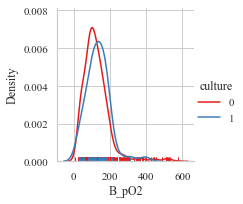

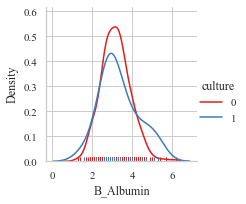

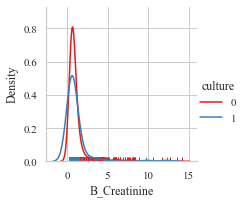

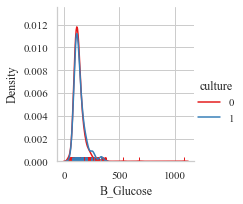

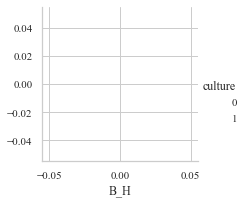

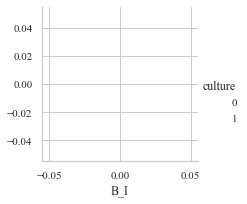

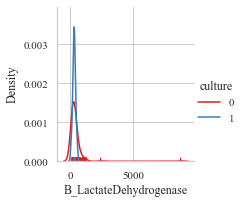

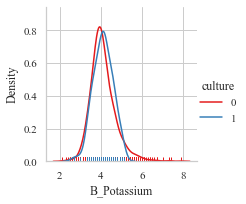

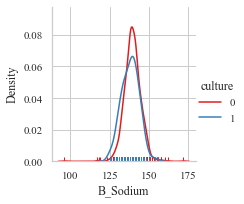

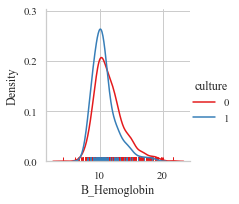

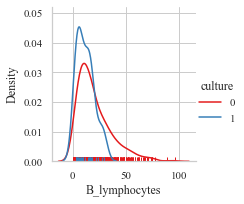

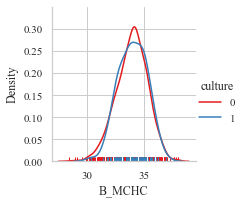

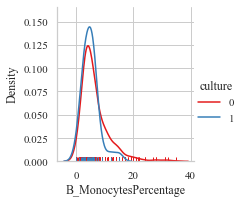

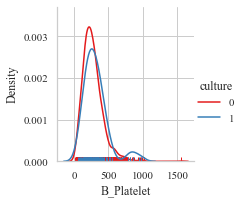

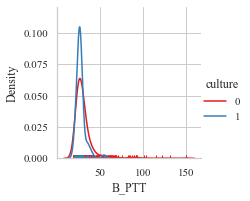

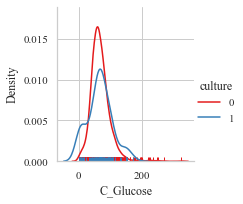

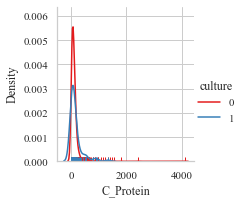

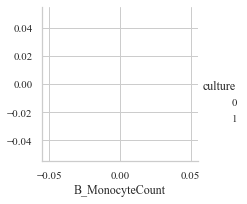

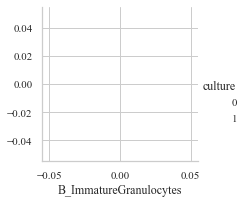

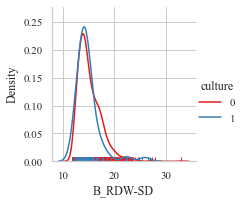

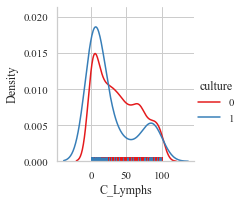

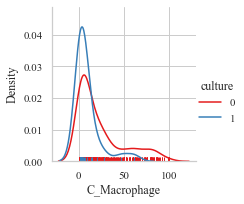

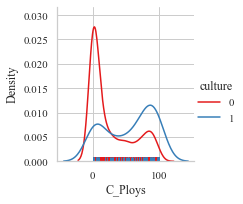

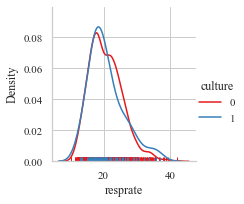

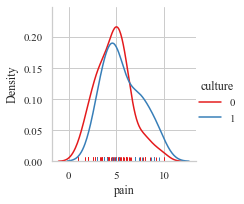

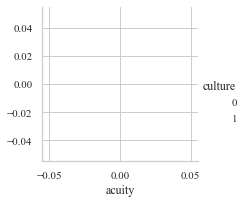

In [115]:
# feature distribution of the numerical variables on CPR labels
for col in colname[:-1]: 
    plot_distribution(col, 20)

In [116]:
# generate correlation matrix of the numerical variables 
df_input1 = df_input.drop(['culture'], 1)
#correlation
correlation = df_input1.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

In [117]:
FullNamesList = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

In [118]:
# from pylab import mpl
import matplotlib as mpl
# mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman'
mpl.rcParams['font.sans-serif'] = 'Times New Roman'
font = {'family': 'Times New Roman',
            'color': 'k',
            'weight': 'normal',
            'size': 25,}

In [119]:
temp1 = corr_array<-0.4
temp2 = corr_array>0.4
corr_bool = temp1 | temp2
condition = corr_bool==False
array_new = np.where(condition, corr_bool, "*")
array_new = np.where(array_new=='*', array_new, "")
array_new

array([['*', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
        '', '', '', '', '', '', '', '', '', ''],
       ['', '*', '', '', '', '', '', '', '', '*', '', '', '', '', '', '',
        '', '', '', '', '', '', '', '', '', ''],
       ['', '', '*', '', '', '', '', '', '', '', '', '', '', '', '', '',
        '', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '*', '', '', '', '', '', '', '', '', '', '', '', '',
        '', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
        '', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
        '', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '*', '', '', '', '', '', '', '', '', '',
        '', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '*', '', '', '', '', '', '', '', '',
        '', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '

In [120]:
np.isnan(corr_array[9:10,:10])

array([[False, False, False, False,  True,  True, False, False, False,
        False]])

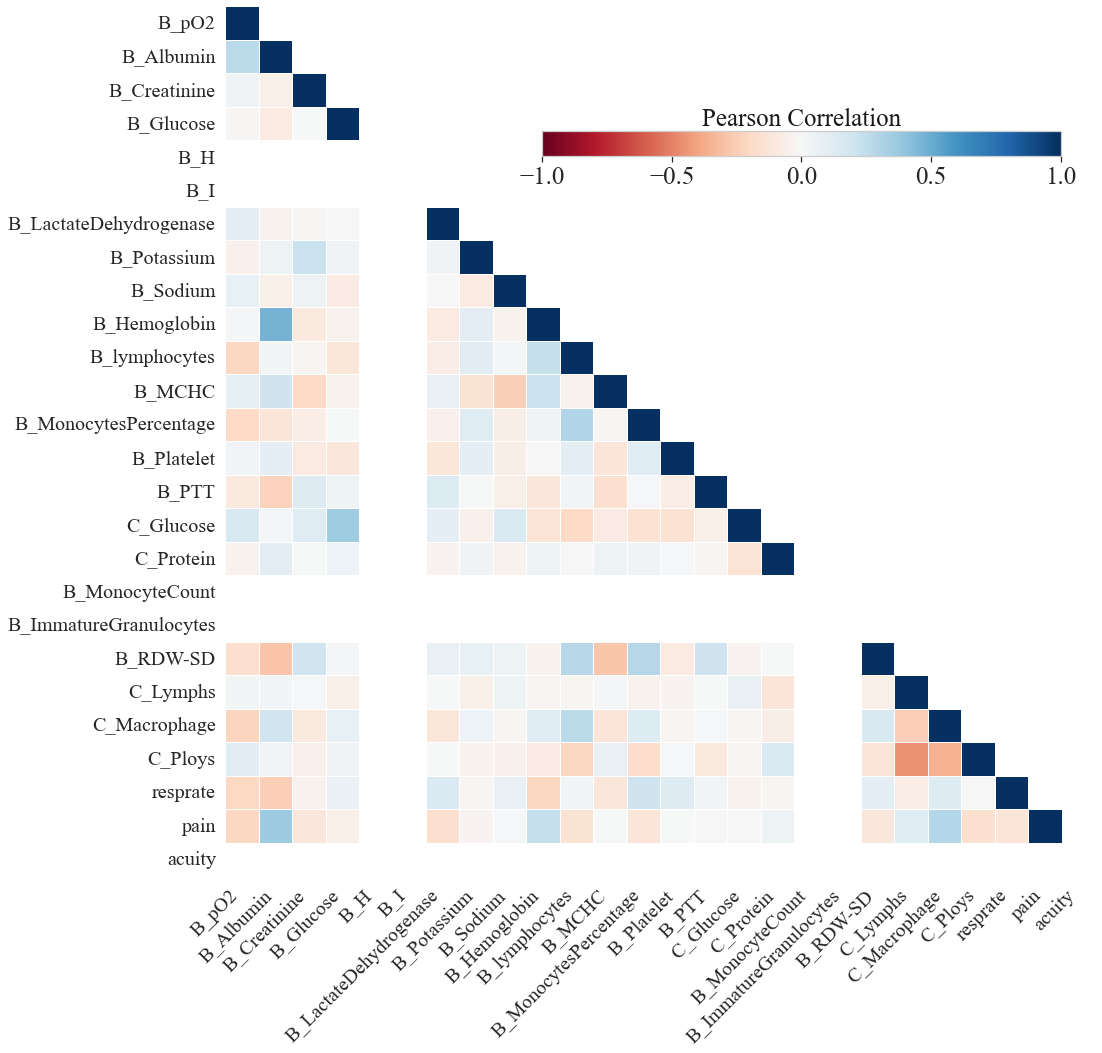

In [121]:
mask = np.ones_like(corr_array, dtype=np.bool)
mask[np.tril_indices_from(mask)] = False

fig = plt.figure(figsize=(16,16))
ax = sns.heatmap(data=corr_array, 
            cmap='RdBu',
            square=True,
            mask = mask,
            linewidths=1,
            linecolor="white",
#             annot=array_new,
            fmt='',         
            annot_kws={"size":20}, 
            xticklabels=FullNamesList,
            yticklabels=FullNamesList,
            vmin=-1, vmax=1,
            cbar=False,
#             cbar_kws={"shrink": 0.6, "location":'top', "use_gridspec":False},
           )
plt.xticks([i + 0.5 for i in range(len(FullNamesList))], FullNamesList, rotation = 45, fontsize=20, ha='right', fontname="Times New Roman")  # ha为文字的旋转中心
plt.yticks([i + 0.5 for i in range(len(FullNamesList))], FullNamesList, rotation = 0, fontsize=20, ha='right')

position = fig.add_axes([0.41, 0.75, 0.45, 0.022]) # 
cbar1 = plt.colorbar(ax.collections[0], cax=position, orientation='horizontal', )
cbar1.ax.tick_params(labelsize=25)
# cbar1.set_label(r'Pearson Correlation1',fontdict=font, loc='center') 
cbar1.ax.set_title(r'Pearson Correlation',fontdict=font)  

plt.show()

In [122]:
# from pylab import mpl
import matplotlib as mpl
# mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman'
mpl.rcParams['font.sans-serif'] = 'Times New Roman'
font = {'family': 'Times New Roman',
            'color': 'k',
            'weight': 'normal',
       'size' : 25}

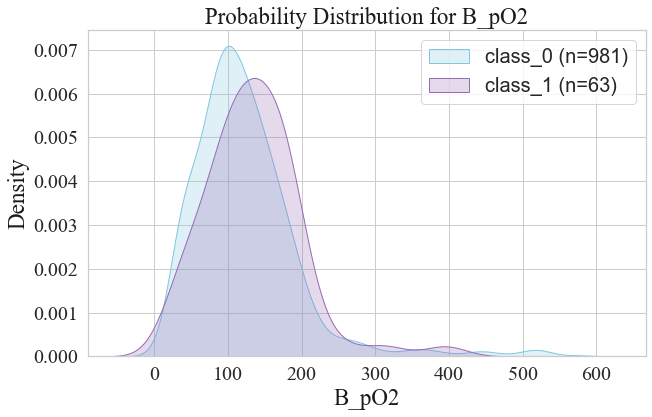

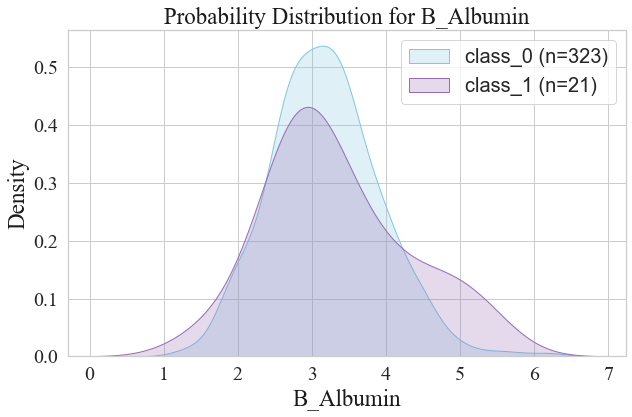

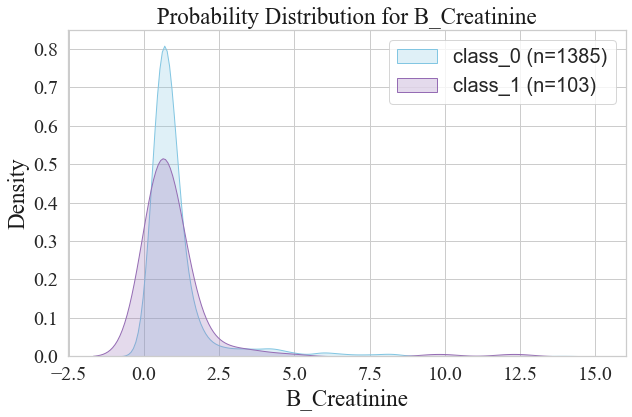

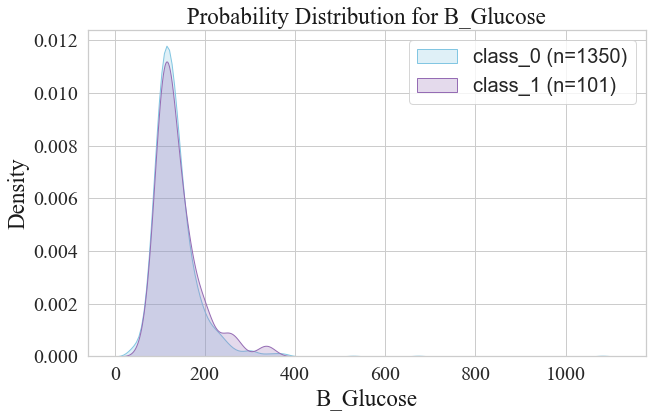

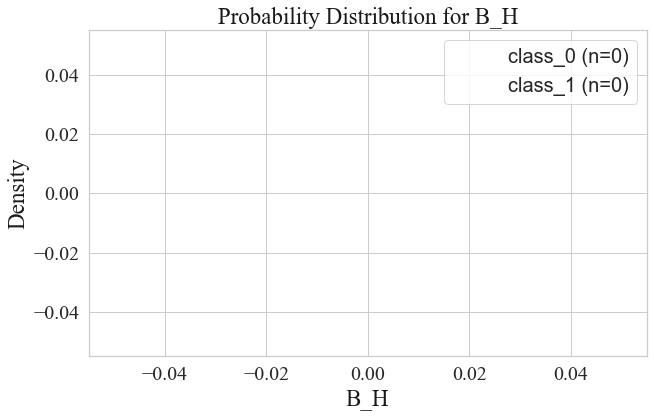

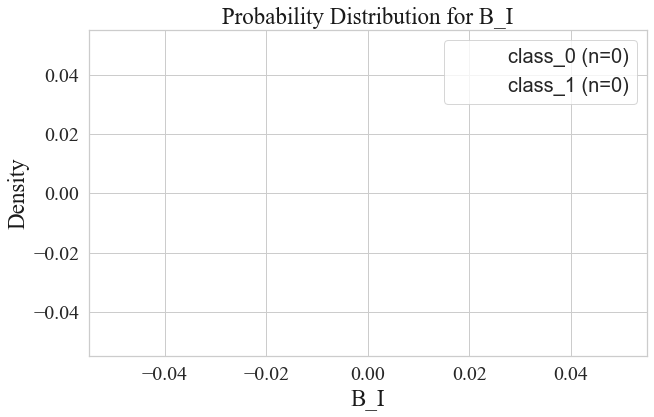

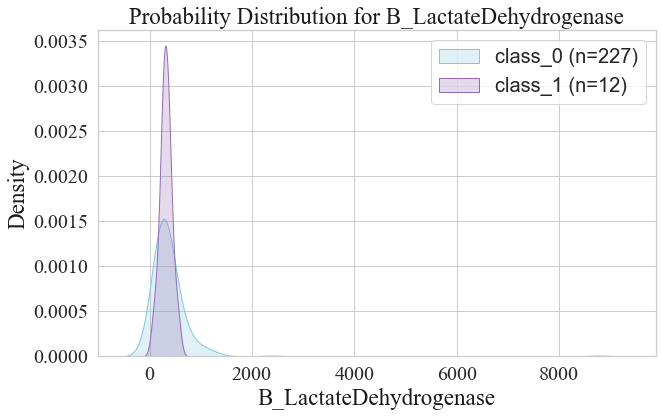

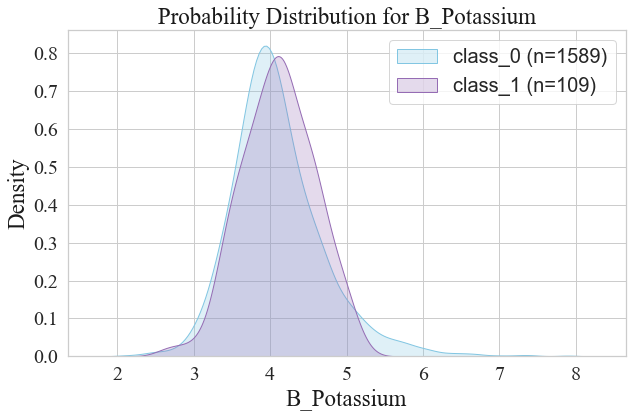

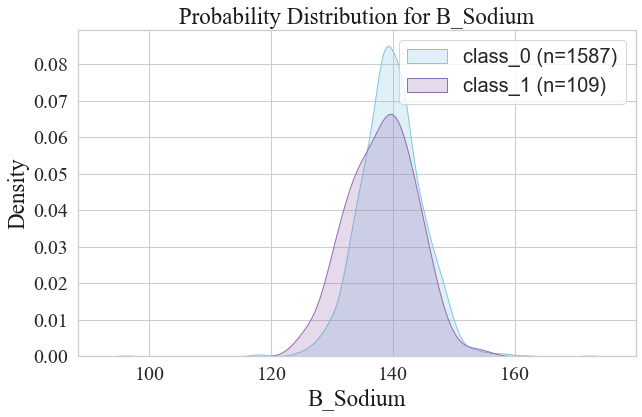

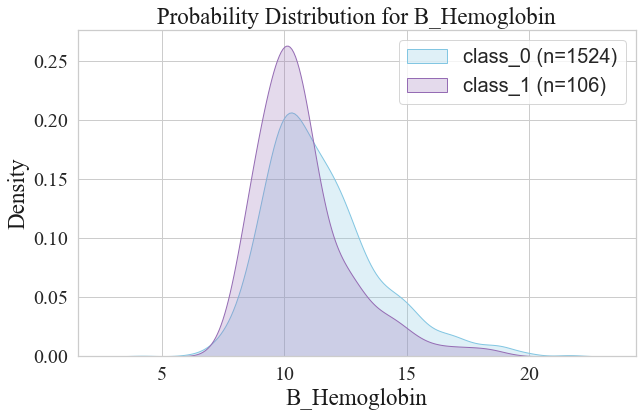

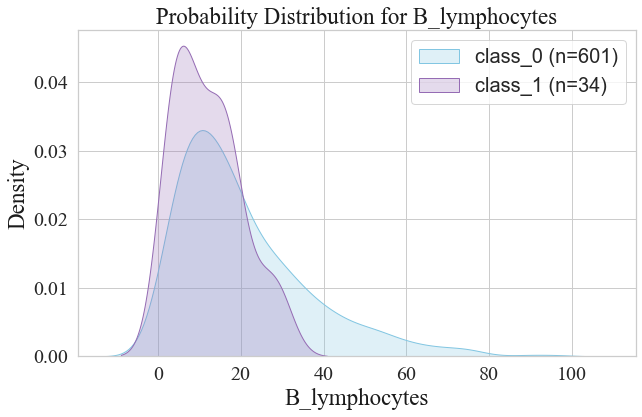

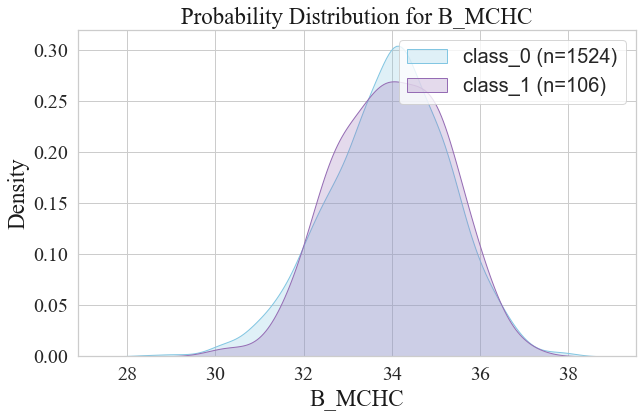

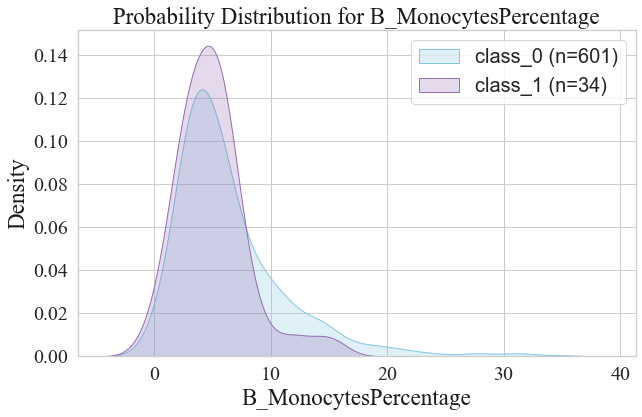

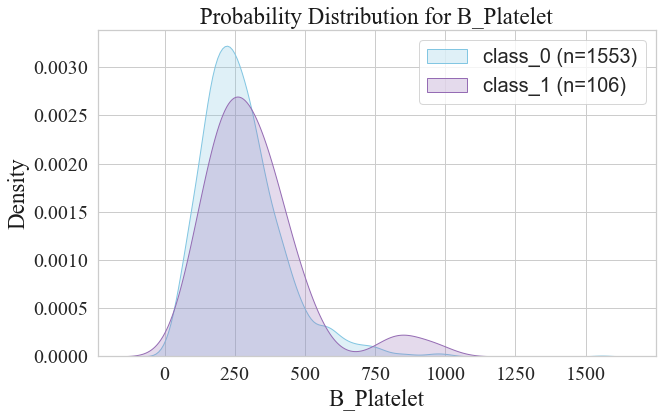

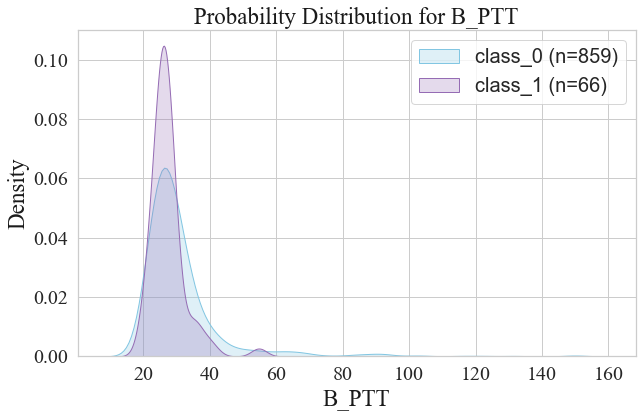

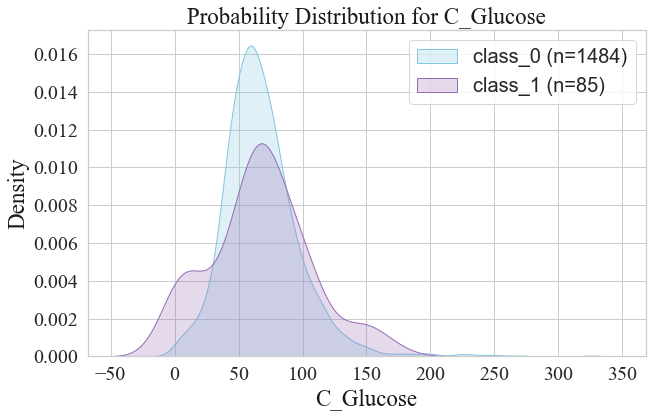

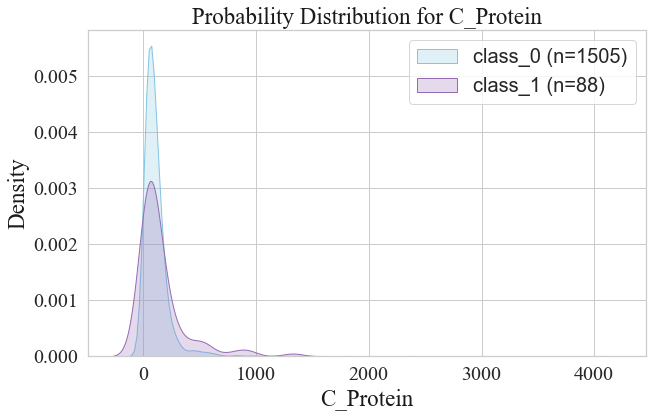

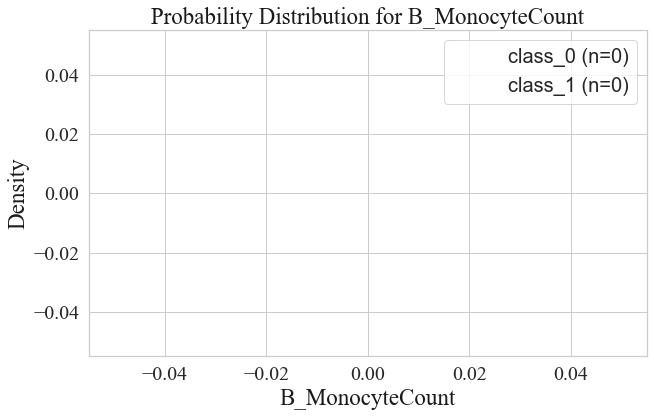

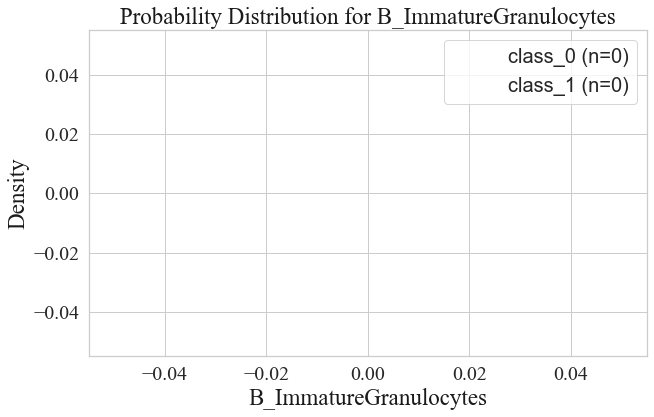

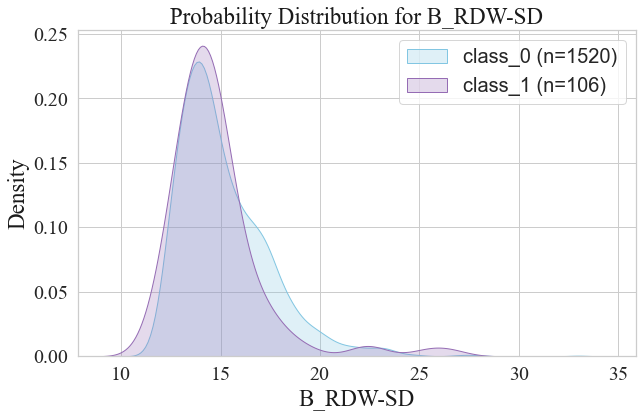

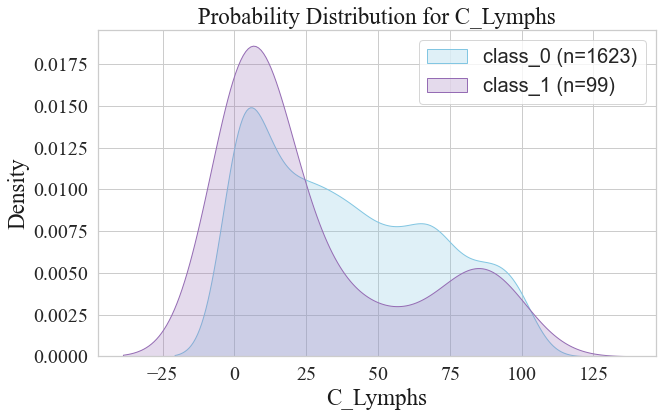

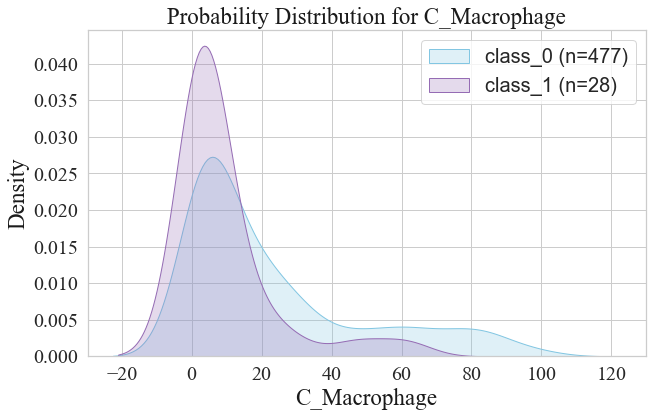

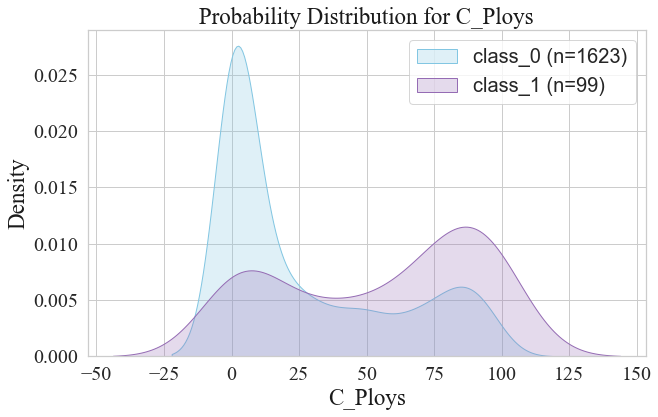

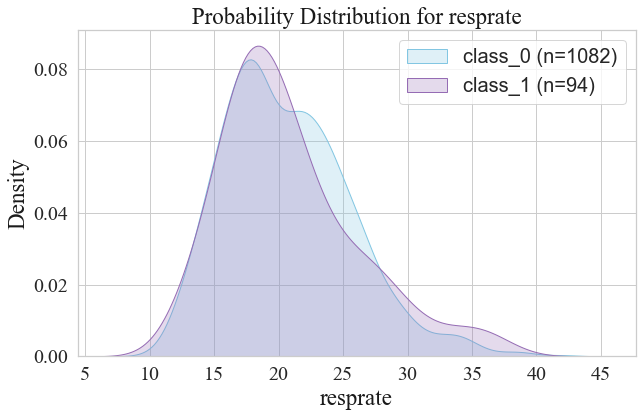

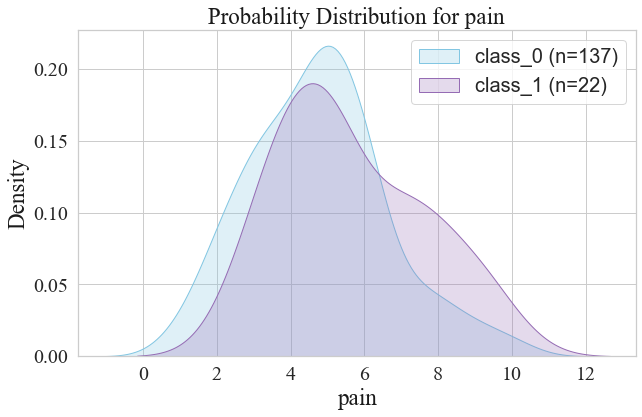

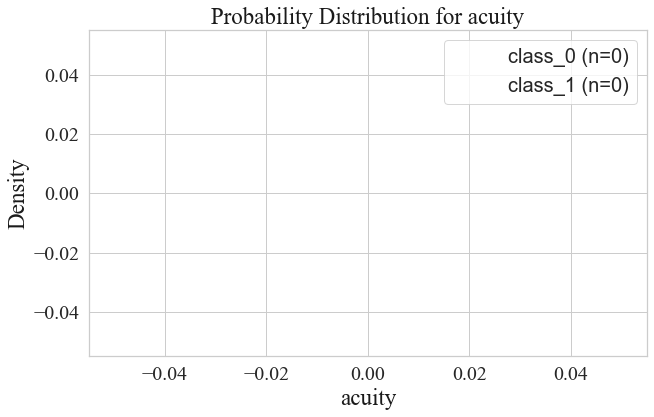

In [123]:
for i in range(df_input.shape[1]-1):
    features = df_input.columns.tolist()[i]
    grouped = df_input.groupby('culture')

    class_0 = grouped.get_group(0)[features].dropna()
    class_1 = grouped.get_group(1)[features].dropna()

    count_class_0 = class_0.count()
    count_class_1 = class_1.count()

    sns.set(style="whitegrid", palette="muted")
    plt.figure(figsize=(10, 6))

    def plot_with_legend(data, label, count, color):
        if count > 1:
            sns.kdeplot(data, label=f'{label} (n={count})', shade=True, color=color)
        elif count == 1:
            plt.scatter(data, [0], label=f'{label} (n={count})', color=color, zorder=10)
        else:
            plt.plot([], [], label=f'{label} (n={count})', alpha=0, marker='o', markersize=10, color=color)

    colors = sns.color_palette("muted", n_colors=10)
    
    plot_with_legend(class_0, 'class_0', count_class_0, colors[9])
    plot_with_legend(class_1, 'class_1', count_class_1, colors[4])

    plt.title(f'Probability Distribution for {features}', fontdict=font, fontsize=23) 
    
    lab_event_name = str(features).replace('<', '').replace('>', '').replace('/', '') 
    
    plt.xlabel(lab_event_name, fontdict=font, fontsize=23) 
    plt.ylabel('Density', fontdict=font, fontsize=23) 
    
    plt.xticks(fontsize=20, fontname='Times New Roman')  # 
    plt.yticks(fontsize=20, fontname='Times New Roman')  #
    
    plt.legend(fontsize=20)  

    plt.show()
    plt.close()

In [124]:
df_input.to_csv("E:/CNSI_project/demo_and_data_5.0/Processed_data/Extr_val/aim1_dataset_ExVal.csv",index=False)

In [133]:
df_input1 = df_input.copy()
df_input1[df_input1.iloc[:, :-1] == 0] = np.nan
df_input1 = df_input1.dropna(thresh=(df_input1.shape[1]-1)*0.4, axis=0)
df_input1.to_excel("E:/CNSI_project/demo_and_data_5.0/Processed_data/Extr_val/aim1_dataset_ExVal_0toNan_0.4filter.xlsx",index=False)
df_input1

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,B_lymphocytes,B_MCHC,B_MonocytesPercentage,B_Platelet,B_PTT,C_Glucose,C_Protein,B_MonocyteCount,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Ploys,resprate,pain,acuity,culture
0,111.0,NaN,0.7,101.0,NaN,NaN,204.0,3.7,133.0,NaN,NaN,NaN,NaN,184.0,28.5,63.0,63.0,NaN,NaN,NaN,33.0,NaN,37.0,12.076923,NaN,NaN,0
1,NaN,3.1,0.5,107.0,NaN,NaN,NaN,3.4,138.0,10.8,NaN,35.1,NaN,45.0,37.7,57.0,37.0,NaN,NaN,13.0,NaN,NaN,NaN,17.066667,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,146.0,19.9,28.0,34.3,9.0,73.0,NaN,73.0,109.0,NaN,NaN,17.2,37.0,6.0,1.0,NaN,NaN,NaN,0
5,NaN,NaN,0.7,111.0,NaN,NaN,NaN,3.6,145.0,14.4,21.5,34.8,3.3,182.0,27.3,71.0,41.0,NaN,NaN,13.8,63.0,NaN,61.0,16.800000,NaN,NaN,0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.8,47.0,33.0,3.0,241.0,NaN,72.0,70.0,NaN,NaN,17.1,9.0,16.0,1.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,NaN,NaN,0.8,147.0,NaN,NaN,NaN,4.0,142.0,11.1,NaN,34.4,NaN,292.0,24.2,93.0,64.0,NaN,NaN,13.7,4.0,NaN,85.0,22.065217,NaN,NaN,0
2112,158.0,NaN,0.9,149.0,NaN,NaN,NaN,3.9,141.0,11.4,NaN,34.4,NaN,341.0,NaN,93.0,44.0,NaN,NaN,13.2,11.0,4.0,69.0,23.571429,NaN,NaN,0
2113,98.0,NaN,1.0,142.0,NaN,NaN,274.0,3.8,143.0,10.6,NaN,34.1,NaN,370.0,24.5,75.0,75.0,NaN,NaN,13.2,8.0,27.0,63.0,25.758621,NaN,NaN,0
2114,111.0,NaN,0.9,156.0,NaN,NaN,NaN,4.9,142.0,9.8,NaN,34.6,NaN,395.0,25.6,94.0,30.0,NaN,NaN,13.0,29.0,NaN,63.0,23.560000,NaN,NaN,0
